In [11]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from pmdarima import auto_arima

# Change pandas plotting backend to plotly to have an interactive plot
pd.options.plotting.backend = "plotly"


In [3]:
# Read the CSV file
df = pd.read_csv("XAUUSD.csv", skiprows=2,parse_dates=True, names=['Date', 'Open', 'High', 'Low', 'Close', "Change(pros)", 'change(%)'])

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date']).dt.date
# Drop any possible NaN values
df = df.dropna()
# Set the Date column as the index
df.set_index('Date', inplace=True)
# Sort the DataFrame by Date
df.sort_index(inplace=True)
print(df.head)
df["Close"].plot.line()


<bound method NDFrame.head of                Open     High      Low    Close  Change(pros)  change(%)
Date                                                                   
2021-07-04  1787.22  1787.73  1785.00  1786.39           -83      -0.05
2021-07-05  1786.68  1794.00  1783.80  1791.15           447       0.25
2021-07-06  1790.85  1814.89  1789.89  1795.68           483       0.27
2021-07-07  1795.28  1809.50  1793.41  1803.22           794       0.44
2021-07-08  1803.29  1818.00  1793.90  1803.75            46       0.03
...             ...      ...      ...      ...           ...        ...
2023-06-29  1909.47  1913.00  1893.16  1908.76           -71      -0.04
2023-06-30  1908.71  1922.61  1900.57  1919.20          1049       0.55
2023-07-02  1920.30  1920.30  1917.50  1917.70          -260      -0.14
2023-07-03  1917.70  1930.50  1910.11  1921.17           347       0.18
2023-07-04  1921.07  1930.22  1920.34  1929.65           858       0.44

[622 rows x 6 columns]>


# Augmented Dickey-Fuller (ADF) Test

The **Augmented Dickey-Fuller (ADF) test** is a statistical test used to determine whether a given time series is stationary or not. It tests the null hypothesis that a unit root is present in a time series sample, with the alternative hypothesis usually being stationarity or trend-stationarity.

The ADF test expands the Dickey-Fuller test equation to include high order regressive process in the model, adding more thoroughness to the test. The ADF test ensures that the null hypothesis is accepted unless there is strong evidence against it to reject in favor of the alternate stationarity hypothesis.

In [4]:
# test dataset for seasonality a
dftest = adfuller(df["Close"], autolag='AIC')
print("ADF =  ", dftest[0])
print("P-value =  ", dftest[1])
print("Number of lags = ", dftest[2])
print("Number of observations used for ADF regression and critical values calculation", dftest[3])
print("Critical values : ")
for key, val in dftest[4].items():
    print("/t", key, ": ", val)

ADF =   -1.8512425385035889
P-value =   0.35533399855974857
Number of lags =  0
Number of observations used for ADF regression and critical values calculation 621
Critical values : 
/t 1% :  -3.440924132966757
/t 5% :  -2.866205413627313
/t 10% :  -2.5692545786625383


# ADF Test Results

- **ADF Test Statistic:** -1.8512425385035889
- **P-value:** 0.35533399855974857
- **Number of Lags:** 0
- **Number of Observations:** 621

## Critical Values

- **1%:** -3.440924132966757
- **5%:** -2.866205413627313
- **10%:** -2.5692545786625383

Since the test statistic is greater than all of the critical values, we cannot reject the null hypothesis that a unit root is present in the time series sample at any of the significance levels. This suggests that the time series is non-stationary.

Since this p-value is greater than common significance levels (such as 0.05), we cannot reject the null hypothesis based on the p-value either.

# ARIMA

An **Autoregressive Integrated Moving Average (ARIMA)** model is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. It is a generalization of an autoregressive moving average (ARMA) model.

The ARIMA model is used as a forecasting tool to predict how something will act in the future based on past performance. It is used in technical analysis to predict an asset's future performance.

For more information, you can check these links:
- [Machine Learning Plus](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)
- [University of Illinois at Chicago](https://ademos.people.uic.edu/Chapter23.html)
- [Statsmodels ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)


The **ARIMA (p, d, q)** model is an extension of the Autoregressive Moving Average model [ARMA (p, q)], which is a combination of Autoregressive and Moving Average models AR (p) and MA (q) respectively. The ARIMA model requires three different parameters:
- `p`: the autoregressive parameters
- `d`: the number of differencing passes
- `q`: moving average parameters

The `auto_arima` function in Python is part of the `pmdarima` library, which is designed for time series analysis. The function automatically finds the optimal parameters for an ARIMA model, which can be very convenient as the data preparation and parameter tuning processes can be time-consuming.

Some important arguments for the `auto_arima` function include:
- `start_p`: the order of the auto-regressive (AR) model
- `start_q`: the order of the moving average (MA) model
- `d`: the order of first-differencing. The default is set to None
- `test`: type of unit root test to use in order to detect stationarity


In [5]:
model = auto_arima(df["Close"], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      d=None,           # let model determine 'd'
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5112.555, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5109.248, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5111.243, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5111.243, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5107.400, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.650 seconds


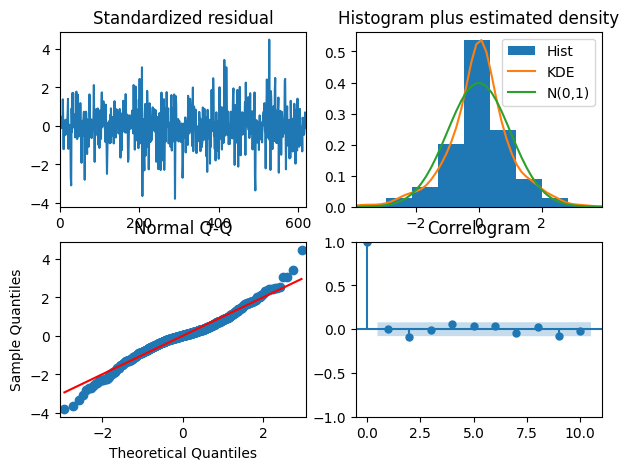

In [6]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

Spliting dataset to train and test datasets by ratio of 8:2

In [7]:
X = df["Close"].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In this cell, we perform walk-forward validation on a time series dataset using the ARIMA model. 

We store the training data in a list called `history`, and create an empty list called `predictions` to store the predicted values.

For each value in the test set, we fit an ARIMA model with the order (0,1,0) to the data in `history`. We then use this model to make a one-step forecast and append the predicted value to the `predictions` list. We append the observed value from the test set to `history`, and print both the predicted and expected values.

In [8]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(0,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

predicted=1872.940000, expected=1874.970000
predicted=1874.970000, expected=1862.230000
predicted=1862.230000, expected=1865.280000
predicted=1865.280000, expected=1854.340000
predicted=1854.340000, expected=1854.940000
predicted=1854.940000, expected=1836.510000
predicted=1836.510000, expected=1834.220000
predicted=1834.220000, expected=1842.340000
predicted=1842.340000, expected=1838.590000
predicted=1838.590000, expected=1841.650000
predicted=1841.650000, expected=1835.500000
predicted=1835.500000, expected=1825.020000
predicted=1825.020000, expected=1823.240000
predicted=1823.240000, expected=1810.670000
predicted=1810.670000, expected=1811.800000
predicted=1811.800000, expected=1817.080000
predicted=1817.080000, expected=1825.490000
predicted=1825.490000, expected=1836.510000
predicted=1836.510000, expected=1837.660000
predicted=1837.660000, expected=1855.180000
predicted=1855.180000, expected=1852.190000
predicted=1852.190000, expected=1846.290000
predicted=1846.290000, expected=

Let's plot both the predicted and actual values together to see how accurate our model's predictions were. To do this, we create a DataFrame `res` from a dictionary containing two keys: "test" and "prediction". The values for these keys are the `test` and `predictions` lists, respectively.


In [9]:
res = pd.DataFrame(dict(test= test,prediction=  predictions))
fig = res.plot.line()
fig.show()

## Time Series Performance Metrics

- **Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It is calculated as the average absolute difference between the predicted and actual values.

- **Mean Squared Error (MSE)**: MSE measures the average squared difference between the predicted and actual values. It is more sensitive to outliers than MAE, as larger errors have a greater impact on the final value.

- **Root Mean Squared Error (RMSE)**: RMSE is the square root of MSE. It measures the standard deviation of the prediction errors and, like MSE, is more sensitive to outliers than MAE. Since it is in the same units as the predicted and actual values, it is often easier to interpret than MSE.


In [12]:

def evaluate_performance(predictions, test):
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print("MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.")
    
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print("MSE measures the average squared difference between the predicted and actual values. It is more sensitive to outliers than MAE.")
    
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("RMSE is the square root of MSE. It measures the standard deviation of the prediction errors.")

evaluate_performance(predictions=predictions, test=test)

Mean Absolute Error (MAE): 11.13
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.
Mean Squared Error (MSE): 239.98
MSE measures the average squared difference between the predicted and actual values. It is more sensitive to outliers than MAE.
Root Mean Squared Error (RMSE): 15.49
RMSE is the square root of MSE. It measures the standard deviation of the prediction errors.
